📥 1. Load dan Preprocessing Data

In [26]:
from keras.datasets import fashion_mnist
import tensorflow as tf

# Load dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalisasi pixel
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Bagi validasi dan latih
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Tambahkan channel (28, 28) → (28, 28, 1)
X_train = X_train[..., tf.newaxis]
X_valid = X_valid[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

🧠 2. Bangun Arsitektur CNN

In [27]:
from keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=[28, 28, 1]),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # mencegah overfitting
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


⚙️ 3. Compile dan Train Model

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7454 - loss: 0.7020 - val_accuracy: 0.8816 - val_loss: 0.3181
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8852 - loss: 0.3139 - val_accuracy: 0.9028 - val_loss: 0.2550
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9058 - loss: 0.2547 - val_accuracy: 0.9120 - val_loss: 0.2338
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9187 - loss: 0.2245 - val_accuracy: 0.9160 - val_loss: 0.2225
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9259 - loss: 0.2000 - val_accuracy: 0.9222 - val_loss: 0.2129
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9340 - loss: 0.1808 - val_accuracy: 0.9274 - val_loss: 0.2036
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9421 - loss: 0.1581 - val_accuracy: 0.9252 - val_loss: 0.2070
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9467 - loss: 0.1394 

📈 4. Visualisasi Learning Curve

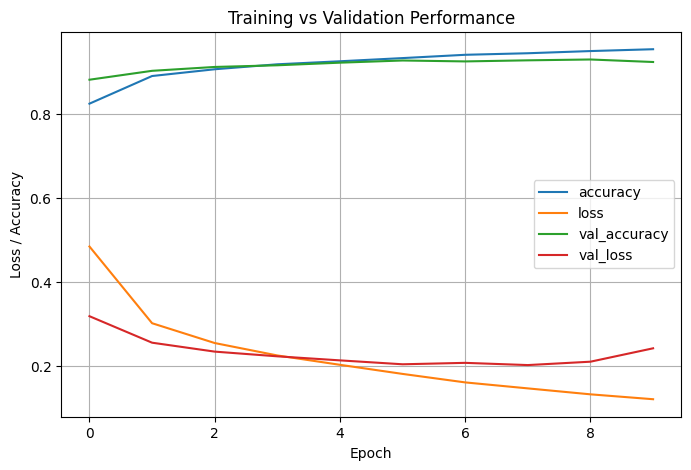

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.title("Training vs Validation Performance")
plt.show()

🧪 5. Evaluasi & Prediksi

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9213 - loss: 0.2637
Test Accuracy: 0.9205999970436096


🔍 6. Prediksi & Visualisasi Label

In [31]:
import numpy as np

y_proba = model.predict(X_test[:5])
y_pred = np.argmax(y_proba, axis=1)
print("Prediksi label:", y_pred)
print("Label asli    :", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Prediksi label: [9 2 1 1 6]
Label asli    : [9 2 1 1 6]


In [32]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(5):
    print(f"Gambar {i+1}: Prediksi = {class_names[y_pred[i]]}, Asli = {class_names[y_test[i]]}")

Gambar 1: Prediksi = Ankle boot, Asli = Ankle boot
Gambar 2: Prediksi = Pullover, Asli = Pullover
Gambar 3: Prediksi = Trouser, Asli = Trouser
Gambar 4: Prediksi = Trouser, Asli = Trouser
Gambar 5: Prediksi = Shirt, Asli = Shirt


## ✅ Catatan:

* CNN cocok untuk data visual karena menjaga struktur spasial.
* MaxPooling membantu mengurangi dimensi sambil mempertahankan fitur.
* Padding `"same"` berguna agar ukuran output tetap konsisten.
* Model bisa diperluas dengan **BatchNormalization**, **Data Augmentation**, **Transfer Learning** (bab selanjutnya).